# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: Clustering and dimension-reduction
### VIDEO: ICA
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

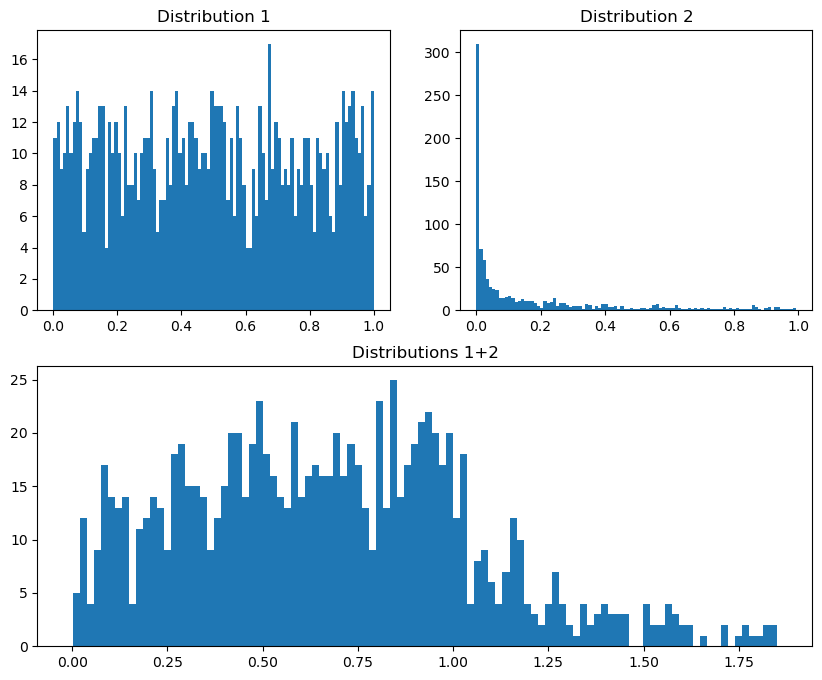

In [8]:
## Create the data

#number of data points
N = 1000

#a non-Gaussian distribution
dist1 = np.random.rand(N) # uniform distribution 

# another non-Gaussian distribution
dist2 = np.random.rand(N)**4 # uniform dist raised to the 4th power - puts a lot of data clustered close to zero
# the frequency of data values gets smaller as that value gets larger towards 1.
# this occurs because exponential operations on numbers less than 1 tend towards zero.

# setup the figure
fig = plt.figure(constrained_layout=False,figsize=(10,8))
axs = fig.add_gridspec(2,2)


# individual distributions
ax1 = fig.add_subplot(axs[0,0])
ax1.hist(dist1,100)
ax1.set_title('Distribution 1')

# second data set with the power law-ish distribution (^4)
ax2 = fig.add_subplot(axs[0,1])
ax2.hist(dist2,100)
ax2.set_title('Distribution 2')

# and their summed histogram - dist of the signals combined - looks more like a gaussian than the other dists
# (growing central limit theorem - getting more gaussian as random signals added)
ax3 = fig.add_subplot(axs[1,:])
ax3.hist(dist1+dist2,100)
ax3.set_title('Distributions 1+2')

plt.show()

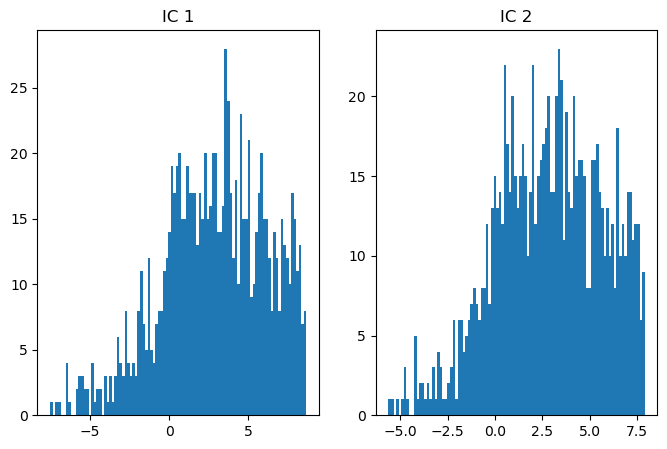

In [9]:
## ICA

# two non-Gaussian distributions
# First channel: 40% of dataset 1 and 30% of dataset 2
# second channel: 80% of dataset 1 minus 70% of dataset 2
data = np.vstack((.4*dist1+.3*dist2, .8*dist1-.7*dist2))

# ICA and scores
fastica = FastICA(max_iter=10000,tol=.0000001)
b = fastica.fit_transform(data)
iscores = b@data


# plot distributions

# IC 1
fig,ax = plt.subplots(1,2,figsize=(8,5))
ax[0].hist(iscores[0,:],100)
ax[0].set_title('IC 1')

# IC 2 - does not look really like the power law type distribution for data set 2 (?)
ax[1].hist(iscores[1,:],100)
ax[1].set_title('IC 2')


plt.show()

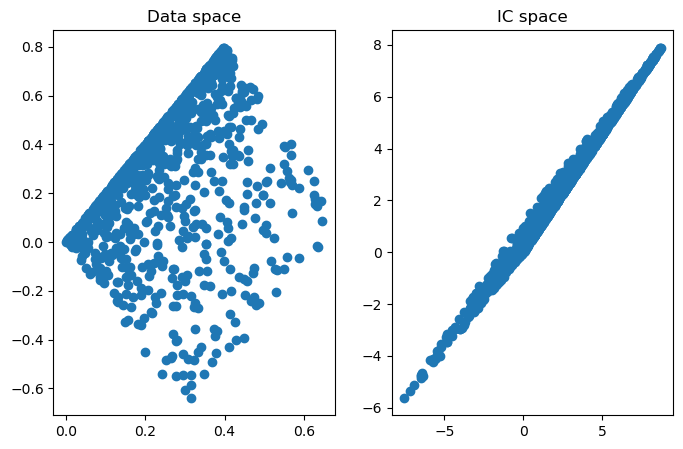

In [10]:
## look at the data in data space and IC space



fig,ax = plt.subplots(1,2,figsize=(8,5))

ax[0].plot(data[0,:],data[1,:],'o')
ax[0].set_title('Data space')

ax[1].plot(iscores[0,:],iscores[1,:],'o')
ax[1].set_title('IC space')
plt.show()

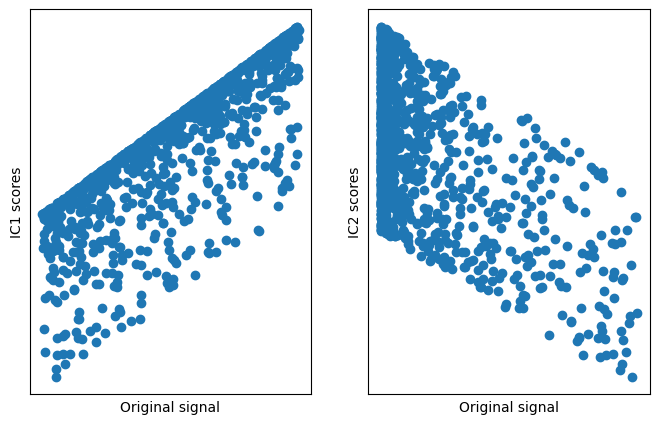

In [11]:
## show that the original data match the ICs

# now plot data as a function of ICs
fig,ax = plt.subplots(1,2,figsize=(8,5))

ax[0].plot(dist1,iscores[0,:],'o')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel('Original signal')
ax[0].set_ylabel('IC1 scores')

ax[1].plot(dist2,iscores[1,:],'o')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlabel('Original signal')
ax[1].set_ylabel('IC2 scores')
plt.show()

# What we want to see is a straight line of data in the plot (means that IC 1 is reconstructing the original signal correctly)
# see https://www.udemy.com/course/statsml_x/learn/lecture/20246068#questions/12378072 at timestamp 9:50

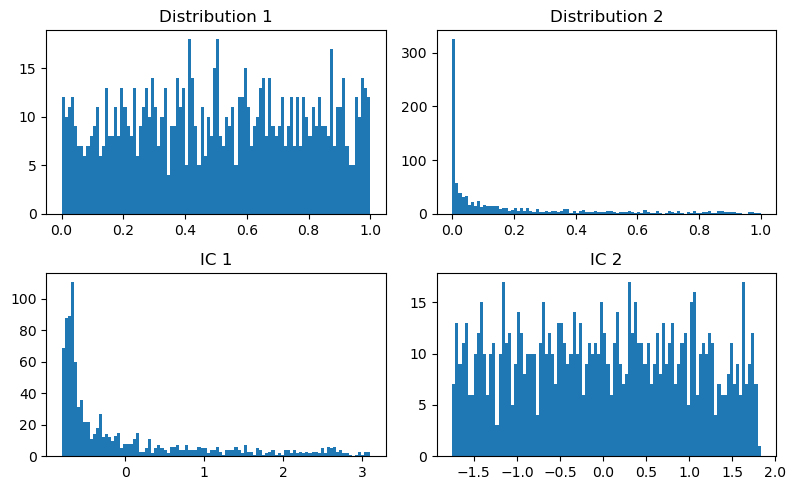

In [12]:
## This code produces a better result - worth analyzing and comparing above
# from https://www.udemy.com/course/statsml_x/learn/lecture/20246068#questions/12378072

#two non-Gaussian distribution
N = 1000 #number of data points
dist1 = np.random.rand(N)
dist2 = np.random.rand(N)**4
 
# two non-Gaussian distributions
data = np.vstack((.4*dist1+.3*dist2, .8*dist1-.7*dist2))
 
# ICA
fastica = FastICA(max_iter=10000,tol=.0000001)
b = fastica.fit_transform(data.T)
 
# plot distributions
fig,ax = plt.subplots(2,2,figsize=(8,5))
 
# individual distributions
ax[0,0].hist(dist1,100)
ax[0,0].set_title('Distribution 1')
ax[0,1].hist(dist2,100)
ax[0,1].set_title('Distribution 2')
 
# ICA components
ax[1,0].hist(b[:,0],100)
ax[1,0].set_title('IC 1')
ax[1,1].hist(b[:,1],100)
ax[1,1].set_title('IC 2')
 
plt.tight_layout()
plt.show()